# System Model V3 - Punchline simulation

The purpose of this notebook is to simulate a single run of the full CDP and APT system model, using a stochastic Ethereum price and liquidity demand process as a driver.


We want to run a basic simuluation in order to serve as a sanity check. We want the simulation to have no liquidity shocks, the controller on and off, to show the difference, arbitrageur considers the liquidation ratio, and target price scaling. The market price presented should be stable and should reflect the movement and volatility of the realized sample path of the ETH price.

In order to test this, configure the following experiment [punchline.py](https://github.com/BlockScience/reflexer/blob/master/experiments/system_model_v3/punchline.py). We use the recommended params with a sweep of controller on/off. Run run this simulation, we create a directory in the ```experiments/system_model_v3``` called ```punchline/```,and add a ```logs/``` directory inside of it.

Assuming our we have all of the requirements required (run requirements.txt from the ```reflexer/``` root directory to be sure) and assuming our terminal is in the root directory, we run the follow to run the simulation:

```bash
python -m experiments.system_model_v3.punchline
```
And our simulation will run. The resulting [run log](https://github.com/BlockScience/reflexer/blob/master/experiments/system_model_v3/punchline/experiment_run_log.md)
 can be found in the ```experiments/system_model_v3/punchline/``` directory, along with the simulation results stored as ```experiment_results.hdf5```


Below we will import and examine the simulation results.


In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

## Import simulation run data


In [2]:
os.getcwd()

'/home/aclarkdata/repos/reflexer/notebooks/analysis/experiment_notebooks'

In [3]:
os.chdir('../../../')
os.getcwd()

'/home/aclarkdata/repos/reflexer'

In [4]:
experiment_results = 'experiments/system_model_v3/punchline/experiment_results.hdf5'
experiment_results_keys = []
with pd.HDFStore(experiment_results) as store:
    experiment_results_keys = list(filter(lambda x: "results" in x, store.keys()))
    exceptions_keys = list(filter(lambda x: "exceptions" in x, store.keys()))

In [5]:
# A list of all experiment result keys
experiment_results_keys

['/results_2021-04-02T09:50:01.982250',
 '/results_2021-04-02T10:12:47.116748',
 '/results_2021-04-02T10:55:20.088056',
 '/results_2021-04-02T11:54:16.083752',
 '/results_2021-04-02T11:54:35.846568',
 '/results_2021-04-02T12:16:22.350339',
 '/results_2021-04-02T12:30:22.401448',
 '/results_2021-04-02T12:50:54.729931',
 '/results_2021-04-02T13:03:01.499116',
 '/results_2021-04-02T13:17:07.575832',
 '/results_2021-04-02T13:34:22.278095',
 '/results_2021-04-09T09:44:02.142555']

In [6]:
# Copy a results_ key from the above keys to select the experiment
experiment_results_key = experiment_results_keys[-1]
experiment_timestamp = experiment_results_key.strip('results_')
exceptions_key = 'exceptions_' + experiment_timestamp
experiment_timestamp

'/results_2021-04-09T09:44:02.142555'

In [7]:
df_raw = pd.read_hdf(experiment_results, experiment_results_key)
df_raw.tail()

,cdp_metrics,optimal_values,sim_metrics,timedelta,cumulative_time,timestamp,blockheight,eth_price,liquidity_demand,liquidity_demand_mean,...,RAI_balance,ETH_balance,UNI_supply,uniswap_oracle,simulation,subset,run,substep,timestep,events
82082,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...","{'u_1': 0.0, 'u_2': 0.0, 'v_1': 0.0, 'v_2': 0.0}",{},3600,31514400,2017-12-31 18:00:00,0,295.089401,-7056.911981,-4682.583295,...,6.460935e+06,327408.645523,1.343489e+07,None,0,0,10,18,8754,NaN
82083,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...","{'u_1': 0.0, 'u_2': 0.0, 'v_1': 0.0, 'v_2': 0.0}",{},3600,31518000,2017-12-31 19:00:00,0,296.754460,-1.137756,-2341.860525,...,6.461973e+06,327356.076011,1.343488e+07,None,0,0,10,18,8755,NaN
82084,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...","{'u_1': 0.0, 'u_2': 0.0, 'v_1': 0.0, 'v_2': 0.0}",{},3600,31521600,2017-12-31 20:00:00,0,295.050631,-2.635811,-1172.248168,...,6.465319e+06,327187.159458,1.343488e+07,None,0,0,10,18,8756,NaN
82085,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...","{'u_1': 0.0, 'u_2': 0.0, 'v_1': 0.0, 'v_2': 0.0}",{},3600,31525200,2017-12-31 21:00:00,0,294.210482,-2255.421516,-1713.834842,...,6.460982e+06,327407.477542,1.343488e+07,<models.system_model_v3.model.parts.uniswap_or...,0,0,10,18,8757,NaN
82086,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...","{'u_1': 0.0, 'u_2': 0.0, 'v_1': 0.0, 'v_2': 0.0}",{},3600,31528800,2017-12-31 22:00:00,0,293.422330,2338.247918,312.206538,...,6.462698e+06,327557.549844,1.343975e+07,<models.system_model_v3.model.parts.uniswap_or...,0,0,10,18,8758,NaN


## Post process

In [8]:
from experiments.system_model_v3.post_process import post_process_results
from experiments.system_model_v3.punchline import params, SIMULATION_TIMESTEPS

In [9]:
df = post_process_results(df_raw, params, set_params=['ki', 'kp', 'liquidation_ratio','controller_enabled'])
df

Adding new columns
0.033746957778930664
Getting parameter sweep
0.033893585205078125
Assigning parameters to subsets
0.16904640197753906
Creating target_price_scaled
0.17720603942871094


,cdp_metrics,optimal_values,sim_metrics,timedelta,cumulative_time,timestamp,blockheight,eth_price,liquidity_demand,liquidity_demand_mean,...,substep,timestep,events,eth_collateral_value,collateralization_ratio,ki,kp,liquidation_ratio,controller_enabled,target_price_scaled
0,{},{},{},0,0,2017-01-01 00:00:00,0,294.069151,1.000000,1.000000,...,0,0,NaN,4.553000e+07,1.450000,-5.000000e-09,2.000000e-07,1.45,True,4.553000
1,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...","{'u_1': 0.0, 'u_2': 0.0, 'v_1': 0.0, 'v_2': 0.0}",{},3600,3600,2017-01-01 01:00:00,0,291.208252,906.674484,453.837242,...,18,1,NaN,4.508705e+07,1.435893,-5.000000e-09,2.000000e-07,1.45,True,3.140000
2,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...","{'u_1': 0.0, 'u_2': 4529962.747462511, 'v_1': ...",{},3600,7200,2017-01-01 02:00:00,0,292.287792,-326.024615,63.906314,...,18,2,NaN,3.142197e+07,1.455375,-5.000000e-09,2.000000e-07,1.45,True,3.140000
3,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...","{'u_1': 0.0, 'u_2': 0.0, 'v_1': 0.0, 'v_2': 0.0}",{},3600,10800,2017-01-01 03:00:00,0,289.343698,209.658450,136.782382,...,18,3,NaN,3.110547e+07,1.435395,-5.000000e-09,2.000000e-07,1.45,True,3.140000
4,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...","{'u_1': 0.0, 'u_2': 0.0, 'v_1': 0.0, 'v_2': 0.0}",{},3600,14400,2017-01-01 04:00:00,0,286.827771,-79.844839,28.468771,...,18,4,NaN,3.083500e+07,1.437392,-5.000000e-09,2.000000e-07,1.45,True,3.140000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82082,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...","{'u_1': 0.0, 'u_2': 0.0, 'v_1': 0.0, 'v_2': 0.0}",{},3600,31514400,2017-12-31 18:00:00,0,295.089401,-7056.911981,-4682.583295,...,18,8754,NaN,5.952158e+06,1.453023,-5.000000e-09,2.000000e-07,1.45,True,11.911000
82083,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...","{'u_1': 0.0, 'u_2': 0.0, 'v_1': 0.0, 'v_2': 0.0}",{},3600,31518000,2017-12-31 19:00:00,0,296.754460,-1.137756,-2341.860525,...,18,8755,NaN,5.985743e+06,1.459717,-5.000000e-09,2.000000e-07,1.45,True,11.898472
82084,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...","{'u_1': 0.0, 'u_2': 0.0, 'v_1': 0.0, 'v_2': 0.0}",{},3600,31521600,2017-12-31 20:00:00,0,295.050631,-2.635811,-1172.248168,...,18,8756,NaN,5.951376e+06,1.443999,-5.000000e-09,2.000000e-07,1.45,True,11.879324
82085,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...","{'u_1': 0.0, 'u_2': 0.0, 'v_1': 0.0, 'v_2': 0.0}",{},3600,31525200,2017-12-31 21:00:00,0,294.210482,-2255.421516,-1713.834842,...,18,8757,NaN,5.934429e+06,1.448202,-5.000000e-09,2.000000e-07,1.45,True,11.860207


# Simulation Analysis

In [10]:
df.substep.unique()

array([ 0, 18])

In [11]:
df.run.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [12]:
df.subset.unique()

array([0])

In [13]:
df.columns

Index(['cdp_metrics', 'optimal_values', 'sim_metrics', 'timedelta',
       'cumulative_time', 'timestamp', 'blockheight', 'eth_price',
       'liquidity_demand', 'liquidity_demand_mean', 'cdps', 'eth_collateral',
       'eth_locked', 'eth_freed', 'eth_bitten', 'principal_debt', 'rai_drawn',
       'rai_wiped', 'rai_bitten', 'accrued_interest', 'interest_bitten', 'w_1',
       'w_2', 'w_3', 'system_revenue', 'stability_fee', 'market_price',
       'market_price_twap', 'target_price', 'target_rate', 'eth_return',
       'eth_gross_return', 'expected_market_price', 'expected_debt_price',
       'error_star', 'error_star_integral', 'market_slippage', 'RAI_balance',
       'ETH_balance', 'UNI_supply', 'uniswap_oracle', 'simulation', 'subset',
       'run', 'substep', 'timestep', 'events', 'eth_collateral_value',
       'collateralization_ratio', 'ki', 'kp', 'liquidation_ratio',
       'controller_enabled', 'target_price_scaled'],
      dtype='object')

### Generate key plots for analysis

In [25]:
df = df.iloc[5:]
controller_on = df.query('run == 9')

# calculate errors

controller_on['error'] = controller_on['target_price'] - controller_on['market_price']
controller_on['error_integral'] = controller_on['error'].cumsum()

<ipython-input-25-5026d55c75e6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  controller_on['error'] = controller_on['target_price'] - controller_on['market_price']
<ipython-input-25-5026d55c75e6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  controller_on['error_integral'] = controller_on['error'].cumsum()


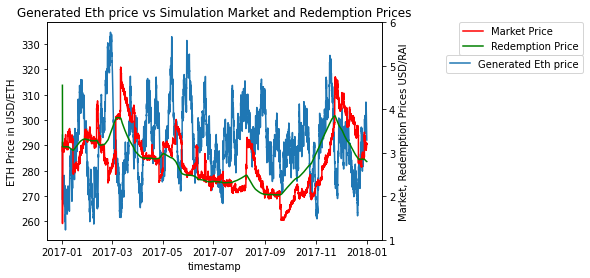

In [15]:
sns.lineplot(data=controller_on,x="timestamp", y="eth_price",label='Generated Eth price',legend=False).set(ylabel='ETH Price in USD/ETH')
plt.legend(bbox_to_anchor=(1.6,0.85), borderaxespad=0)
ax2 = plt.twinx()
sns.lineplot(data=controller_on,x="timestamp", y="market_price",ax=ax2,color='r',label='Market Price')
sns.lineplot(data=controller_on,x="timestamp", y="target_price_scaled",ax=ax2,color='g',label='Redemption Price')
plt.title('Generated Eth price vs Simulation Market and Redemption Prices')
plt.ylabel('Market, Redemption Prices USD/RAI')
plt.xlabel('Simulated Date')
ax2.set_ylim([1,6])
plt.legend(bbox_to_anchor=(1.6,1), borderaxespad=0)
plt.savefig('experiments/system_model_v3/punchline/punchline.png')

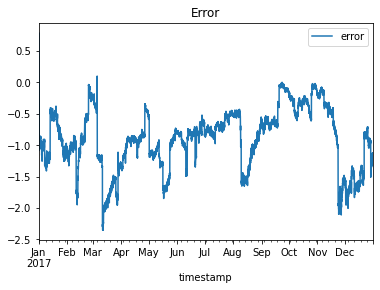

In [16]:
controller_on.plot(x='timestamp',y='error',kind='line',title='Error')

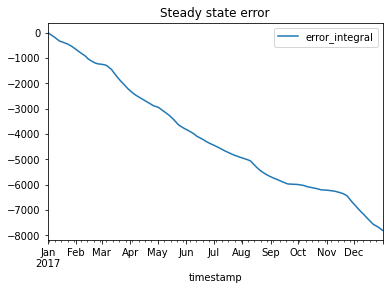

In [17]:
controller_on.plot(x='timestamp',y='error_integral',kind='line',title='Steady state error')

Text(0.5, 1.0, 'Simulation Market and Redemption Prices')

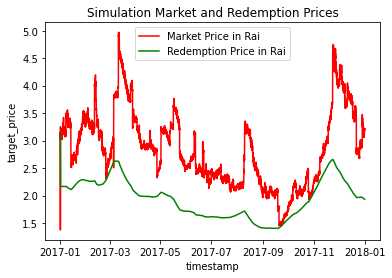

In [18]:
sns.lineplot(data=controller_on,x="timestamp", y="market_price",color='r',label='Market Price in Rai')
sns.lineplot(data=controller_on,x="timestamp", y="target_price",color='g',label='Redemption Price in Rai')
plt.title('Simulation Market and Redemption Prices')

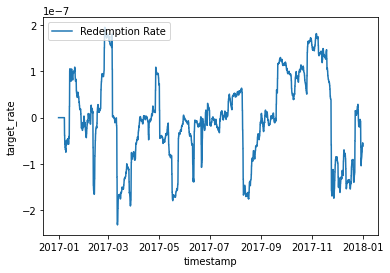

In [19]:
sns.lineplot(data=controller_on,x="timestamp", y="target_rate",label='Redemption Rate')
plt.legend(loc="upper left")
plt.show()

Text(0.5, 1.0, 'RAI balance')

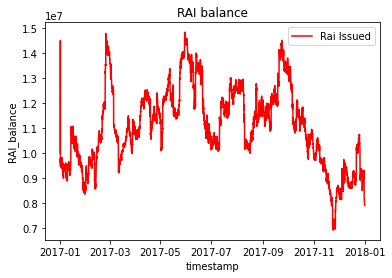

In [20]:
sns.lineplot(data=controller_on,x="timestamp", y="RAI_balance",color='r',label='Rai Issued')
plt.title('RAI balance')


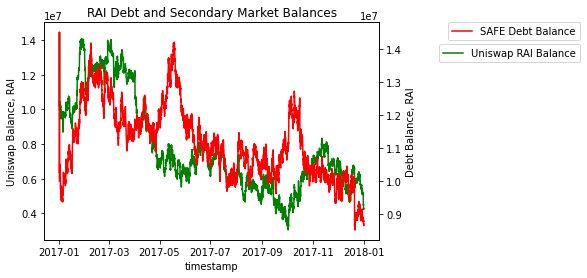

In [29]:
#controller_on["neg_principal_debt"] = controller_on["principal_debt"] * (-1)
sns.lineplot(data=controller_on,x="timestamp", y="RAI_balance",color='g',label='Uniswap RAI Balance', legend = False).set(ylabel="Uniswap Balance, RAI")
plt.legend(bbox_to_anchor=(1.6,0.90), borderaxespad=0)
ax2 = plt.twinx()
#sns.lineplot(data=controller_on,x="timestamp", y="neg_principal_debt",ax=ax2,color='r',label='SAFE Debt Balance')
sns.lineplot(data=controller_on,x="timestamp", y="principal_debt",ax=ax2,color='r',label='SAFE Debt Balance')
plt.title('RAI Debt and Secondary Market Balances')
#plt.ylabel('Debt Balance (negative), RAI')
plt.ylabel('Debt Balance, RAI')
plt.xlabel('Simulated Date')
plt.legend(bbox_to_anchor=(1.6,1), borderaxespad=0)
plt.savefig('experiments/system_model_v3/punchline/RAI_balances_in_CDPUniswap.png')

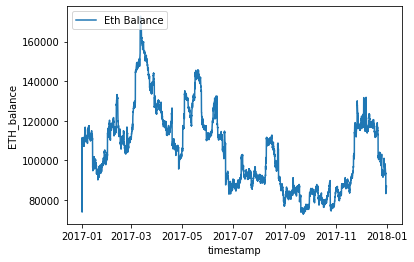

In [22]:
sns.lineplot(data=controller_on,x="timestamp", y="ETH_balance",label='Eth Balance')
plt.legend(loc="upper left")
plt.show()